<a href="https://colab.research.google.com/github/tissueandcells/XAI/blob/main/FA_12_Fe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 596 kB 10.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [ ]:


# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for Fa
target = new_client.target
target_query = target.search('iron chelation')
targets = pd.DataFrame.from_dict(target_query)
targets




,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],None,Iron,16.0,False,CHEMBL2363058,[],METAL,NaN
1,[],Sus scrofa,Succinate dehydrogenase [ubiquinone] iron-sulf...,15.0,False,CHEMBL2366485,"[{'accession': 'Q007T0', 'component_descriptio...",SINGLE PROTEIN,9823.0
2,[],Homo sapiens,Succinate dehydrogenase [ubiquinone] iron-sulf...,15.0,False,CHEMBL4105824,"[{'accession': 'P21912', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,[],Septoria tritici,Mitochondrial complex II; succinate dehydrogenase,14.0,False,CHEMBL613815,"[{'accession': 'G4XX53', 'component_descriptio...",PROTEIN COMPLEX,1047171.0
4,[],Rattus norvegicus,CDGSH iron-sulfur domain-containing protein 1,13.0,False,CHEMBL3308979,"[{'accession': 'B0K020', 'component_descriptio...",SINGLE PROTEIN,10116.0
5,[],Escherichia coli (strain K12),Iron-sulfur cluster insertion protein ErpA,13.0,False,CHEMBL3309017,"[{'accession': 'P0ACC3', 'component_descriptio...",SINGLE PROTEIN,83333.0
6,"[{'xref_id': 'Q9NZ45', 'xref_name': None, 'xre...",Homo sapiens,CDGSH iron-sulfur domain-containing protein 1,12.0,False,CHEMBL1795168,"[{'accession': 'Q9NZ45', 'component_descriptio...",SINGLE PROTEIN,9606.0
7,[],Homo sapiens,Cytosolic iron-sulfur assembly component 2A,12.0,False,CHEMBL4295943,"[{'accession': 'Q9H5X1', 'component_descriptio...",SINGLE PROTEIN,9606.0
8,"[{'xref_id': 'Q8IWW8', 'xref_name': None, 'xre...",Homo sapiens,"Alcohol dehydrogenase, iron containing 1",11.0,False,CHEMBL4947,"[{'accession': 'Q8IWW8', 'component_descriptio...",SINGLE PROTEIN,9606.0
9,"[{'xref_id': 'P80366', 'xref_name': None, 'xre...",Phaseolus vulgaris,Fe(3+)-Zn(2+) purple acid phosphatase,11.0,False,CHEMBL5670,"[{'accession': 'P80366', 'component_descriptio...",SINGLE PROTEIN,3885.0


In [ ]:
selected_target = targets.target_chembl_id[12]
selected_target

'CHEMBL3392948'

In [ ]:


activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
res

[{'activity_comment': None, 'activity_id': 16907389, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL3883076', 'assay_description': 'Antagonist activity at C-terminal halo-tag fused human ferroportin expressed in MDCK cells assessed as inhibition of hepcidin-induced ferroportin internalization after overnight incubation by Draq5 staining-based fluorescence assay', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000219', 'bao_label': 'cell-based format', 'canonical_smiles': 'O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL3882731', 'document_journal': None, 'document_year': 2014, 'ligand_efficiency': {'bei': '13.99', 'le': '0.35', 'lle': '1.31', 'sei': '8.75'}, 'molecule_chembl_id': 'CHEMBL401504', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL401504', 'pchembl_value': '5.17', 'potential_duplica

In [ ]:
df = pd.DataFrame.from_dict(res)
df


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,16907389,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.99', 'le': '0.35', 'lle': '1.31', ...",CHEMBL401504,None,CHEMBL401504,5.17,False,http://www.openphacts.org/units/Nanomolar,2832216,=,38,True,=,None,IC50,nM,None,6800.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,6.8
1,None,16907390,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,None,None,CHEMBL3882731,None,2014.0,"{'bei': '19.61', 'le': '0.38', 'lle': '2.52', ...",CHEMBL428064,None,CHEMBL428064,5.54,False,http://www.openphacts.org/units/Nanomolar,2832217,=,38,True,=,None,IC50,nM,None,2900.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,2.9
2,None,16907391,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.50', 'le': '0.26', 'lle': '0.96', ...",CHEMBL3910392,None,CHEMBL3910392,4.00,False,http://www.openphacts.org/units/Nanomolar,2832218,=,38,True,=,None,IC50,nM,None,100000.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,16907392,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '18.77', 'le': '0.36', 'lle': '2.30', ...",CHEMBL257286,None,CHEMBL257286,5.34,False,http://www.openphacts.org/units/Nanomolar,2832219,=,38,True,=,None,IC50,nM,None,4590.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,4.59
4,None,16907393,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '17.24', 'le': '0.36', 'lle': '1.80', ...",CHEMBL3948191,None,CHEMBL3948191,5.50,False,http://www.openphacts.org/units/Nanomolar,2832220,=,38,True,=,None,IC50,nM,None,3200.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,None,19336393,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,None,None,CHEMBL4419169,None,NaN,"{'bei': '15.38', 'le': '0.30', 'lle': '3.57', ...",CHEMBL4443815,None,CHEMBL4443815,6.75,False,http://www.openphacts.org/units/Nanomolar,3233601,=,38,True,=,None,IC50,nM,None,180.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,0.18
433,None,19336394,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,O=C(NCc1ncccc1F)c1cnc(C

In [ ]:
df.to_csv('drive/MyDrive/Colab Notebooks/FA-12_01_bioactivity_data_raw.csv', index=False)

In [ ]:
#  Handling missing data¶ 
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,16907389,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.99', 'le': '0.35', 'lle': '1.31', ...",CHEMBL401504,None,CHEMBL401504,5.17,False,http://www.openphacts.org/units/Nanomolar,2832216,=,38,True,=,None,IC50,nM,None,6800.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,6.8
1,None,16907390,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,None,None,CHEMBL3882731,None,2014.0,"{'bei': '19.61', 'le': '0.38', 'lle': '2.52', ...",CHEMBL428064,None,CHEMBL428064,5.54,False,http://www.openphacts.org/units/Nanomolar,2832217,=,38,True,=,None,IC50,nM,None,2900.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,2.9
2,None,16907391,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.50', 'le': '0.26', 'lle': '0.96', ...",CHEMBL3910392,None,CHEMBL3910392,4.00,False,http://www.openphacts.org/units/Nanomolar,2832218,=,38,True,=,None,IC50,nM,None,100000.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,16907392,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '18.77', 'le': '0.36', 'lle': '2.30', ...",CHEMBL257286,None,CHEMBL257286,5.34,False,http://www.openphacts.org/units/Nanomolar,2832219,=,38,True,=,None,IC50,nM,None,4590.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,4.59
4,None,16907393,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '17.24', 'le': '0.36', 'lle': '1.80', ...",CHEMBL3948191,None,CHEMBL3948191,5.50,False,http://www.openphacts.org/units/Nanomolar,2832220,=,38,True,=,None,IC50,nM,None,3200.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,None,19336393,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,None,None,CHEMBL4419169,None,NaN,"{'bei': '15.38', 'le': '0.30', 'lle': '3.57', ...",CHEMBL4443815,None,CHEMBL4443815,6.75,False,http://www.openphacts.org/units/Nanomolar,3233601,=,38,True,=,None,IC50,nM,None,180.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,0.18
433,None,19336394,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,O=C(NCc1ncccc1F)c1cnc(C

In [ ]:
len(df2.canonical_smiles.unique())

436

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,16907389,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.99', 'le': '0.35', 'lle': '1.31', ...",CHEMBL401504,None,CHEMBL401504,5.17,False,http://www.openphacts.org/units/Nanomolar,2832216,=,38,True,=,None,IC50,nM,None,6800.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,6.8
1,None,16907390,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,None,None,CHEMBL3882731,None,2014.0,"{'bei': '19.61', 'le': '0.38', 'lle': '2.52', ...",CHEMBL428064,None,CHEMBL428064,5.54,False,http://www.openphacts.org/units/Nanomolar,2832217,=,38,True,=,None,IC50,nM,None,2900.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,2.9
2,None,16907391,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,None,None,CHEMBL3882731,None,2014.0,"{'bei': '13.50', 'le': '0.26', 'lle': '0.96', ...",CHEMBL3910392,None,CHEMBL3910392,4.00,False,http://www.openphacts.org/units/Nanomolar,2832218,=,38,True,=,None,IC50,nM,None,100000.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,16907392,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '18.77', 'le': '0.36', 'lle': '2.30', ...",CHEMBL257286,None,CHEMBL257286,5.34,False,http://www.openphacts.org/units/Nanomolar,2832219,=,38,True,=,None,IC50,nM,None,4590.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,4.59
4,None,16907393,[],CHEMBL3883076,Antagonist activity at C-terminal halo-tag fus...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,None,None,CHEMBL3882731,None,2014.0,"{'bei': '17.24', 'le': '0.36', 'lle': '1.80', ...",CHEMBL3948191,None,CHEMBL3948191,5.50,False,http://www.openphacts.org/units/Nanomolar,2832220,=,38,True,=,None,IC50,nM,None,3200.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,None,19336393,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,None,None,CHEMBL4419169,None,NaN,"{'bei': '15.38', 'le': '0.30', 'lle': '3.57', ...",CHEMBL4443815,None,CHEMBL4443815,6.75,False,http://www.openphacts.org/units/Nanomolar,3233601,=,38,True,=,None,IC50,nM,None,180.0,CHEMBL3392948,Homo sapiens,Solute carrier family 40 member 1,9606,None,None,IC50,uM,UO_0000065,None,0.18
433,None,19336394,[],CHEMBL4419455,Binding affinity to C-terminal FLAG-tagged hum...,B,None,None,BAO_0000190,BAO_0000019,assay format,O=C(NCc1ncccc1F)c1cnc(C

In [ ]:
# Data pre-processing of the bioactivity data¶
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0
...,...,...,...
432,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0
433,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1
434,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0
435,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0


In [ ]:
df3.to_csv('drive/MyDrive/Colab Notebooks/FA-12_02_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
 # Labeling compounds as either being active, inactive or intermediate¶ 
 df4 = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-12_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0,intermediate
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0,intermediate
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0,inactive
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0,intermediate
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0,intermediate
...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0,active
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1,active
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0,active
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0,active


In [ ]:
# Saves dataframe to CSV file
df5.to_csv('drive/MyDrive/Colab Notebooks/FA-12_03_bioactivity_data_curated.csv', index=False)

In [ ]:
# part 2 başlıyor

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-12_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0,intermediate
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0,intermediate
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0,inactive
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0,intermediate
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0,intermediate
...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0,active
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1,active
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0,active
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL401504,6800.0,intermediate
1,CHEMBL428064,2900.0,intermediate
2,CHEMBL3910392,100000.0,inactive
3,CHEMBL257286,4590.0,intermediate
4,CHEMBL3948191,3200.0,intermediate
...,...,...,...
431,CHEMBL4443815,180.0,active
432,CHEMBL4585288,51.1,active
433,CHEMBL4454025,71.0,active
434,CHEMBL4462224,17.0,active


In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL401504,6800.0,intermediate,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1
1,CHEMBL428064,2900.0,intermediate,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21
2,CHEMBL3910392,100000.0,inactive,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O
3,CHEMBL257286,4590.0,intermediate,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1
4,CHEMBL3948191,3200.0,intermediate,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1
...,...,...,...,...
431,CHEMBL4443815,180.0,active,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F
432,CHEMBL4585288,51.1,active,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...
433,CHEMBL4454025,71.0,active,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...
434,CHEMBL4462224,17.0,active,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-19 16:47:04--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   142MB/s    in 0.6s    

2022-01-19 16:47:05 (142 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FA-12_03_bioactivity_data_curated.csv')

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0,intermediate
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0,intermediate
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0,inactive
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0,intermediate
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0,intermediate
...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0,active
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1,active
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0,active
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0,active


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0,intermediate,369.265,3.85960,1.0,4.0
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0,intermediate,282.324,3.01600,1.0,3.0
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0,inactive,296.351,3.04030,0.0,3.0
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0,intermediate,284.340,3.03560,1.0,3.0
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0,intermediate,318.785,3.68900,1.0,3.0
...,...,...,...,...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0,active,438.532,3.16672,3.0,6.0
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1,active,438.438,2.79600,2.0,6.0
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0,active,438.438,2.79600,2.0,6.0
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0,active,420.448,2.65690,2.0,6.0


In [ ]:
#  Convert IC50 to pIC50¶ 

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count       436.000000
mean      14743.981193
std       28732.450968
min          16.000000
25%         595.500000
50%        2110.000000
75%       10717.500000
max      109000.000000
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,intermediate,369.265,3.85960,1.0,4.0,6800.0
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,intermediate,282.324,3.01600,1.0,3.0,2900.0
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,inactive,296.351,3.04030,0.0,3.0,100000.0
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,intermediate,284.340,3.03560,1.0,3.0,4590.0
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,intermediate,318.785,3.68900,1.0,3.0,3200.0
...,...,...,...,...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,active,438.532,3.16672,3.0,6.0,180.0
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,active,438.438,2.79600,2.0,6.0,51.1
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,active,438.438,2.79600,2.0,6.0,71.0
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,active,420.448,2.65690,2.0,6.0,17.0


In [ ]:
df_norm.standard_value_norm.describe()

count       436.000000
mean      14743.981193
std       28732.450968
min          16.000000
25%         595.500000
50%        2110.000000
75%       10717.500000
max      109000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,intermediate,369.265,3.85960,1.0,4.0,5.167491
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,intermediate,282.324,3.01600,1.0,3.0,5.537602
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,inactive,296.351,3.04030,0.0,3.0,4.000000
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,intermediate,284.340,3.03560,1.0,3.0,5.338187
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,intermediate,318.785,3.68900,1.0,3.0,5.494850
...,...,...,...,...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,active,438.532,3.16672,3.0,6.0,6.744727
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,active,438.438,2.79600,2.0,6.0,7.291579
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,active,438.438,2.79600,2.0,6.0,7.148742
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,active,420.448,2.65690,2.0,6.0,7.769551


In [ ]:
df_final.pIC50.describe()

count    436.000000
mean       5.643090
std        0.945643
min        3.962574
25%        4.970168
50%        5.675718
75%        6.225141
max        7.795880
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('drive/MyDrive/Colab Notebooks/FA-12_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
#  Removing the 'intermediate' bioactivity class¶ 
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,inactive,296.351,3.04030,0.0,3.0,4.000000
6,CHEMBL3392552,COc1ccc(S(=O)(=O)Nc2cccc3cccnc23)cc1,inactive,314.366,3.04420,1.0,4.0,4.000000
7,CHEMBL256062,Nc1ccccc1S(=O)(=O)Nc1cccc2cccnc12,inactive,299.355,2.61780,2.0,4.0,4.681937
8,CHEMBL1487635,Cc1ccc(S(=O)(=O)Nc2cccc3cccnc23)cc1,inactive,298.367,3.34402,1.0,3.0,4.301899
9,CHEMBL3964091,Cc1ccccc1S(=O)(=O)Nc1cccc2cccnc12,inactive,298.367,3.34402,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,active,438.532,3.16672,3.0,6.0,6.744727
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,active,438.438,2.79600,2.0,6.0,7.291579
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,active,438.438,2.79600,2.0,6.0,7.148742
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,active,420.448,2.65690,2.0,6.0,7.769551


In [ ]:
df_2class.to_csv('drive/MyDrive/Colab Notebooks/FA-12_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
#  Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

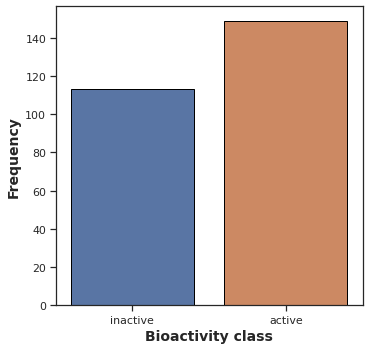

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')



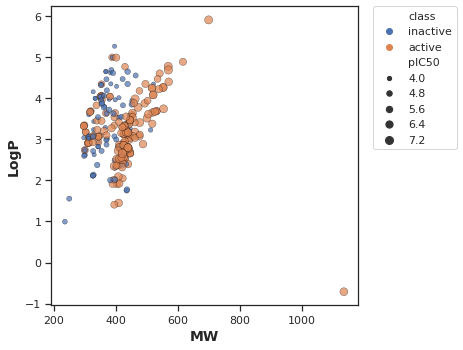

In [ ]:
#  Scatter plot of MW versus LogP¶ 
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

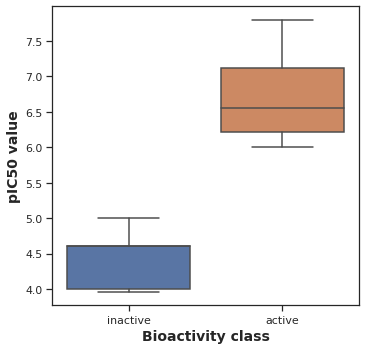

In [ ]:
# Box plots
# pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
# Statistical analysis | Mann-Whitney U Test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,3.231782e-44,0.05,Different distribution (reject H0)


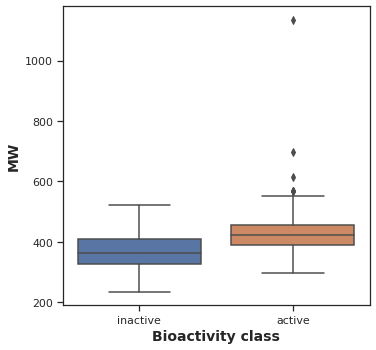

In [ ]:
# MV
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4356.0,1.139680e-11,0.05,Different distribution (reject H0)


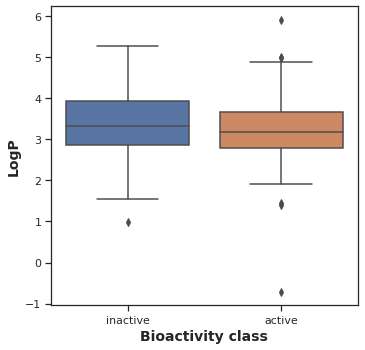

In [ ]:
# LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7749.0,0.135378,0.05,Same distribution (fail to reject H0)


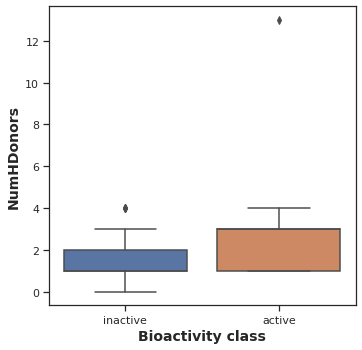

In [ ]:
# NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4553.0,7.243790e-12,0.05,Different distribution (reject H0)


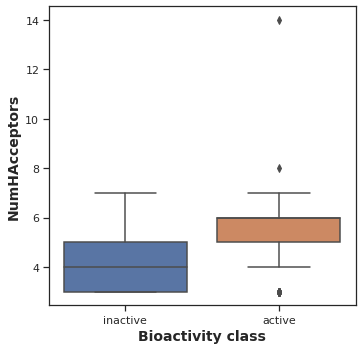

In [ ]:
# NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4256.5,4.863578e-13,0.05,Different distribution (reject H0)


In [ ]:
# part3

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-12-19 17:39:58--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-12-19 17:39:58--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   109MB/s    in 0.2s    

2021-12-19 17:39:59 (109 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-12-19 17:39:59--  https://github

In [ ]:
! mv Miniconda3-latest-Linux-x86_64.sh drive/MyDrive/Colab\ Notebooks/

mv: cannot stat 'Miniconda3-latest-Linux-x86_64.sh': No such file or directory


In [ ]:
! mv *.csv drive/MyDrive/Colab\ Notebooks/

In [ ]:
! mv *.pdf drive/MyDrive/Colab\ Notebooks/

In [ ]:
! mv padel.* drive/MyDrive/Colab\ Notebooks/

In [ ]:
! unzip padel.zip

unzip:  cannot find or open padel.zip, padel.zip.zip or padel.zip.ZIP.


In [ ]:
! unzip drive/MyDrive/Colab\ Notebooks/padel.zip -d drive/MyDrive/Colab\ Notebooks/

Archive:  drive/MyDrive/Colab Notebooks/padel.zip
replace drive/MyDrive/Colab Notebooks/__MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/Fingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._Fingerprinter.xm

In [ ]:
# Load bioactivity data
df3 = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-12_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,intermediate,369.265,3.85960,1.0,4.0,5.167491
1,1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,intermediate,282.324,3.01600,1.0,3.0,5.537602
2,2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,inactive,296.351,3.04030,0.0,3.0,4.000000
3,3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,intermediate,284.340,3.03560,1.0,3.0,5.338187
4,4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,intermediate,318.785,3.68900,1.0,3.0,5.494850
...,...,...,...,...,...,...,...,...,...
431,431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,active,438.532,3.16672,3.0,6.0,6.744727
432,432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,active,438.438,2.79600,2.0,6.0,7.291579
433,433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,active,438.438,2.79600,2.0,6.0,7.148742
434,434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,active,420.448,2.65690,2.0,6.0,7.769551


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('drive/MyDrive/Colab Notebooks/molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat drive/MyDrive/Colab\ Notebooks/molecule.smi | head -5

O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1	CHEMBL401504
O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21	CHEMBL428064
CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O	CHEMBL3910392
O=S(=O)(Nc1cccc2cccnc12)c1ccccc1	CHEMBL257286
O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1	CHEMBL3948191


In [ ]:
cat drive/MyDrive/Colab\ Notebooks/molecule.smi | wc -l

436


In [ ]:
# Calculate fingerprint descriptors
! cat drive/MyDrive/Colab\ Notebooks/padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash drive/MyDrive/Colab\ Notebooks/padel.sh

Error: Unable to access jarfile ./PaDEL-Descriptor/PaDEL-Descriptor.jar


In [ ]:
#  Preparing the X and Y Data Matrices
#X
df3_X = pd.read_csv('drive/MyDrive/Colab Notebooks/descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3989843,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1215658,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1797639,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1797642,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1797643,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,CHEMBL4568420,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,CHEMBL4544926,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,CHEMBL4575332,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1084,CHEMBL4475427,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1084,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Y variable
# Convert IC50 to pIC50

df3_Y = df3['pIC50']
df3_Y

0      5.167491
1      5.537602
2      4.000000
3      5.338187
4      5.494850
         ...   
431    6.744727
432    7.291579
433    7.148742
434    7.769551
435    7.119186
Name: pIC50, Length: 436, dtype: float64

In [ ]:
# Combining X and Y variable
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.167491
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.537602
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.338187
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.494850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1082,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1083,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1084,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL401504,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Br)s1,6800.0,intermediate
1,CHEMBL428064,O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21,2900.0,intermediate
2,CHEMBL3910392,CN1c2c(ccc3cccnc23)-c2ccccc2S1(=O)=O,100000.0,inactive
3,CHEMBL257286,O=S(=O)(Nc1cccc2cccnc12)c1ccccc1,4590.0,intermediate
4,CHEMBL3948191,O=S(=O)(Nc1cccc2cccnc12)c1ccc(Cl)cc1,3200.0,intermediate
...,...,...,...,...
431,CHEMBL4443815,Cc1nc(CCNCCc2nc3ccccc3[nH]2)sc1C(=O)NCc1ncccc1F,180.0,active
432,CHEMBL4585288,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4cc(F)ccc4[nH...,51.1,active
433,CHEMBL4454025,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4c(F)cccc4[nH...,71.0,active
434,CHEMBL4462224,O=C(NCc1ncccc1F)c1cnc(C2CN(CCc3nc4ccccc4[nH]3)...,17.0,active


In [ ]:
dataset3.to_csv('drive/MyDrive/Colab Notebooks/FA-12_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
# Part 4
#  Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest 

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-12_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df.dropna(inplace=True)

df_yeni = df.drop('pIC50', axis=1)
df_yeni

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
434,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_yeni.dropna(inplace=True)

In [ ]:
df_yeni 

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
433,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
434,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y

0      5.167491
1      5.537602
2      4.000000
3      5.338187
4      5.494850
         ...   
431    6.744727
432    7.291579
433    7.148742
434    7.769551
435    7.119186
Name: pIC50, Length: 436, dtype: float64

In [ ]:
df_yeni.shape, Y.shape

((436, 881), (436,))

In [ ]:
#@title Varsayılan başlık metni
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2
                                                    )

NameError: ignored

In [ ]:
len(Y)

436

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.040791706934726446

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train,model.predict(X_train))

0.692405611553197

In [ ]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


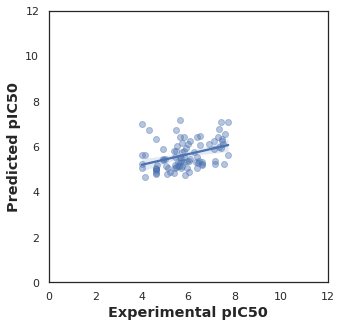

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()